In [1]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

**Load faces**

In [94]:

known_face_encoding1 = face_recognition.face_encodings(face_recognition.load_image_file('blackpink/faces/jennie.jpg'))[0]
known_face_encoding2 = face_recognition.face_encodings(face_recognition.load_image_file('blackpink/faces/jisoo.jpg'))[0]
known_face_encoding3 = face_recognition.face_encodings(face_recognition.load_image_file('blackpink/faces/lisa.jpg'))[0]
known_face_encoding4 = face_recognition.face_encodings(face_recognition.load_image_file('blackpink/faces/rose.jpg'))[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    known_face_encoding1,
    known_face_encoding2,
    known_face_encoding3,
    known_face_encoding4
]
known_face_names = [
    "Jennie",
    "Jisoo",
    "Lisa",
    "Rose"
]

face names: ['Jisoo:66.03%', 'Rose:67.88%', 'Lisa:61.39%', 'Lisa:60.68%', 'Jisoo:75.37%']


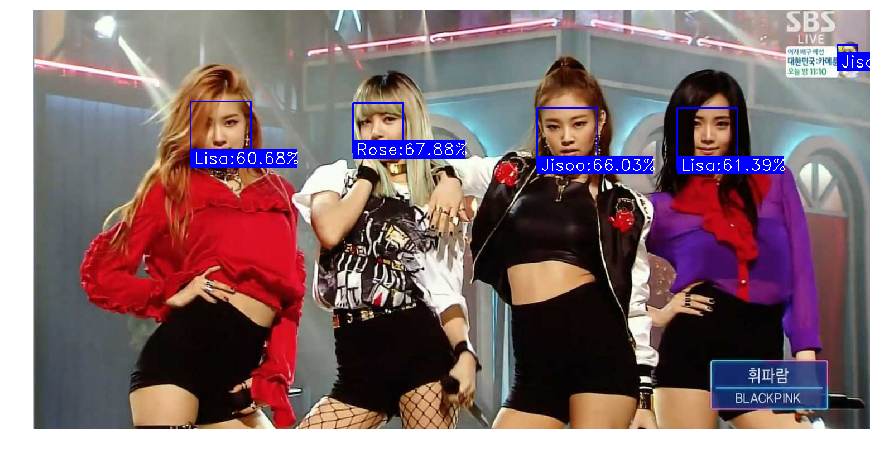

In [108]:
# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
confidentiality = 0.6

# while True:
# # Grab a single frame of video
# ret, frame = video_capture.read()

# # Resize frame of video to 1/4 size for faster face recognition processing
# small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

frame = cv2.imread('blackpink/blackpink7.jpg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
scale = 1
rgb_small_frame = cv2.resize(frame, (0, 0), fx=scale, fy=scale)

# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
# rgb_small_frame = small_frame[:, :, ::-1]

# Only process every other frame of video to save time
# if process_this_frame:
# Find all the faces and face encodings in the current frame of video
face_locations = face_recognition.face_locations(rgb_small_frame)
face_encodings = face_recognition.face_encodings(
    rgb_small_frame, face_locations)

face_names = []
for face_encoding in face_encodings:
    # See if the face is a match for the known face(s)
    distances = face_recognition.face_distance(
        known_face_encodings, face_encoding)
    name = "Unknown"
#     print(face_encoding)
#     print(matches)
    # If a match was found in known_face_encodings, just use the first one.
#     if True in matches:
#         first_match_index = matches.index(True)
#         name = known_face_names[first_match_index]
    distance = max(distances)    
    if distance > confidentiality:
        index = [i for i, j in enumerate(distances) if j == distance][0]
        name = known_face_names[index]
        
    face_names.append(name + ":" + str(round(distance * 100,2)) + "%")

    

print('face names:', face_names)

# process_this_frame = not process_this_frame

# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top = round(top / scale)
    right = round(right / scale)
    bottom = round(bottom / scale)
    left = round(left / scale)

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    font = cv2.FONT_HERSHEY_DUPLEX
    labelSize, baseLine = cv2.getTextSize(
        name, font, 1.0, 1)
    cv2.rectangle(frame, (left, bottom - labelSize[1]),
                  (left + labelSize[0], bottom + baseLine), (0, 0, 255), cv2.FILLED)

    cv2.putText(frame, name, (left + 6, bottom + baseLine - 6),
                font, 1.0, (255, 255, 255), 1)    
#     print(top,right,bottom,left)

plt.figure(figsize=[15,15])
plt.axis('off')
plt.imshow(frame)

In [107]:
for face_encoding in face_encodings:
    distances = face_recognition.face_distance(
            known_face_encodings, face_encoding)
    print(distances)

[0.44608407 0.56562743 0.61500345 0.36696425]
[0.53961374 0.44818352 0.60370646 0.4712672 ]
[0.57298103 0.68098681 0.53197895 0.63645514]
[0.43442282 0.69375294 0.58507615 0.61065252]
